Main notebook containing relevant diagnostics and important figures for the manuscript. 

It is automatically copied from \_\_main\_\_.ipynb and executed for newly trained ensembles using papermill.

This can also be updated and then triggered again by using the script `execute_ensemble_notebook.py'.

In [81]:
from pathlib import Path
import torch
from torch import nn
from torch.nn import functional as nnf
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from flyvision import results_dir
from flyvision import EnsembleView

import logging
from flyvision.analysis.moving_bar_responses import plot_angular_tuning
from flyvision.plots.plt_utils import add_cluster_marker, get_marker
logging.disable(100)


mpl.rcParams["figure.dpi"] = 300

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
ensemble_name = "flow/9997"  # type: str

In [83]:
validation_subdir = "validation"
loss_file_name = "loss"  

In [84]:
ensemble = EnsembleView(ensemble_name, 
                        best_checkpoint_fn_kwargs=
                        { 
                                                   "validation_subdir": validation_subdir,
                                                   "loss_file_name": loss_file_name 
                                                   }
                        )

Loading ensemble:   0%|          | 0/50 [00:00<?, ?it/s]

In [85]:
print(f"Description of experiment: {ensemble[0].dir.config.description}")

Description of experiment: test


# Task performance

## Training and validation losses

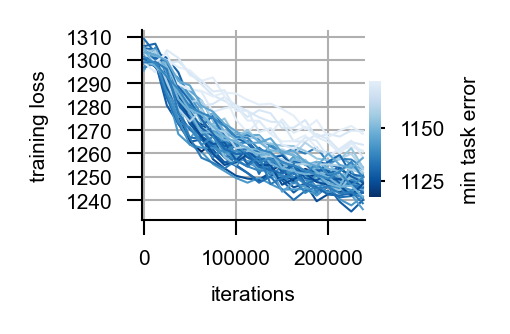

In [86]:
fig, ax = ensemble.training_loss()

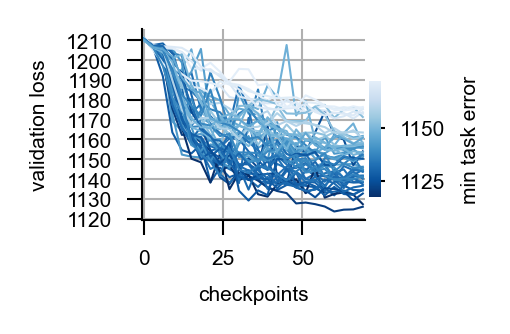

In [87]:
fig, ax = ensemble.validation_loss()

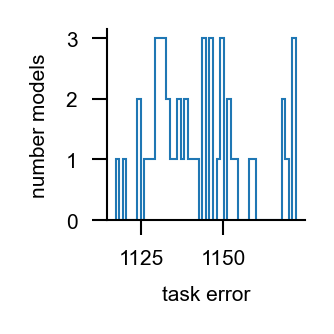

In [88]:
fig, ax = ensemble.task_error_histogram()

## Learned parameter marginals

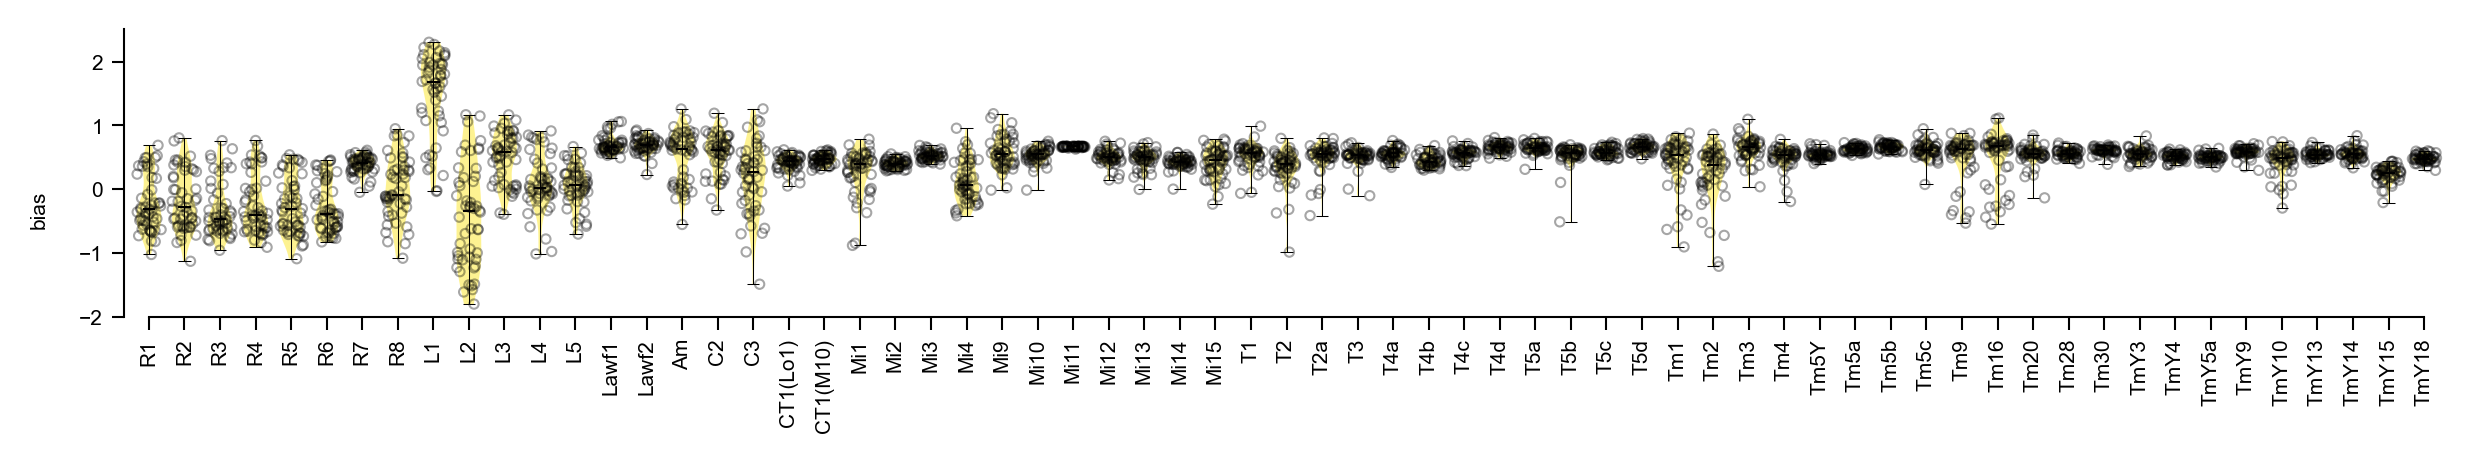

In [89]:
fig, axes = ensemble.node_parameters("bias")

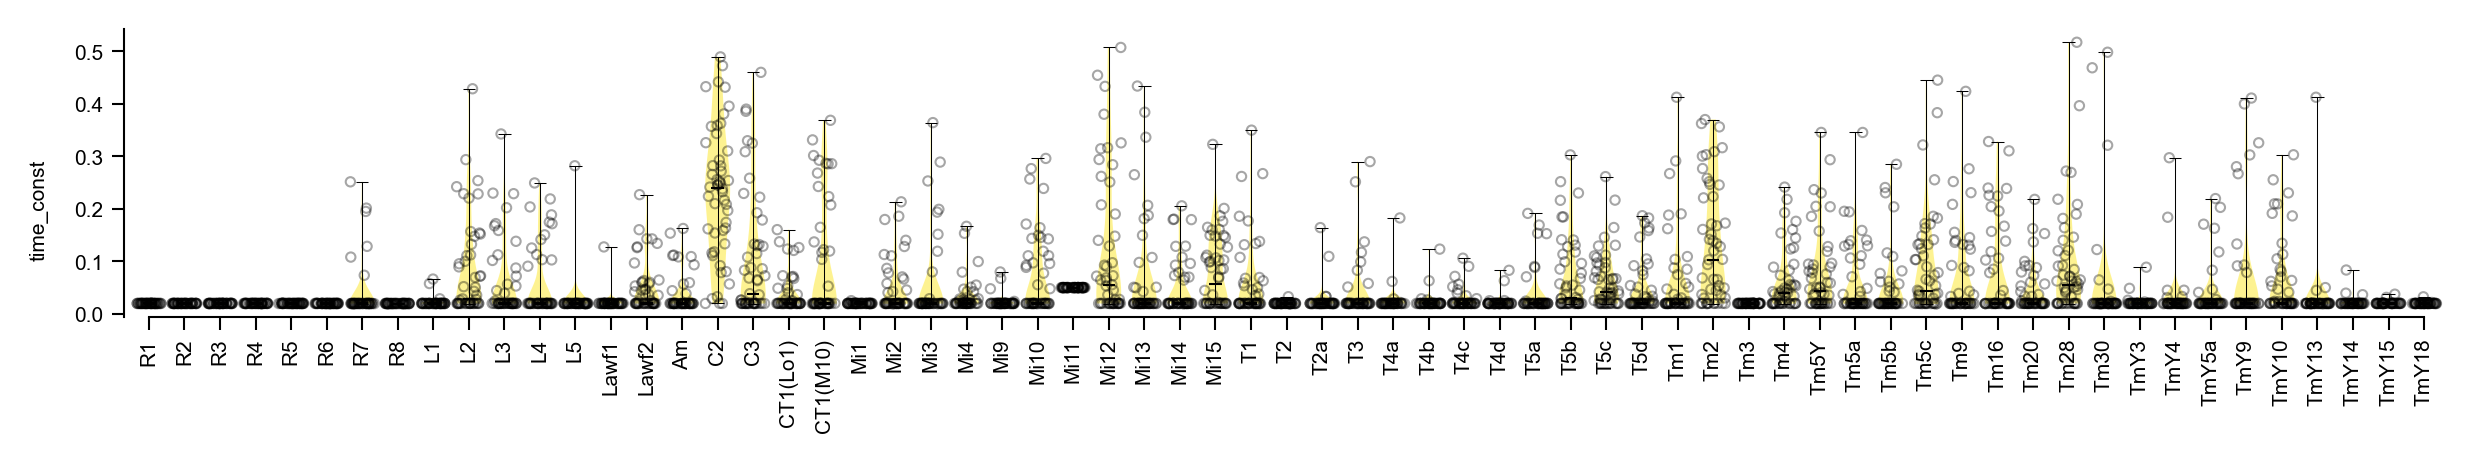

In [90]:
fig, axes = ensemble.node_parameters("time_const")

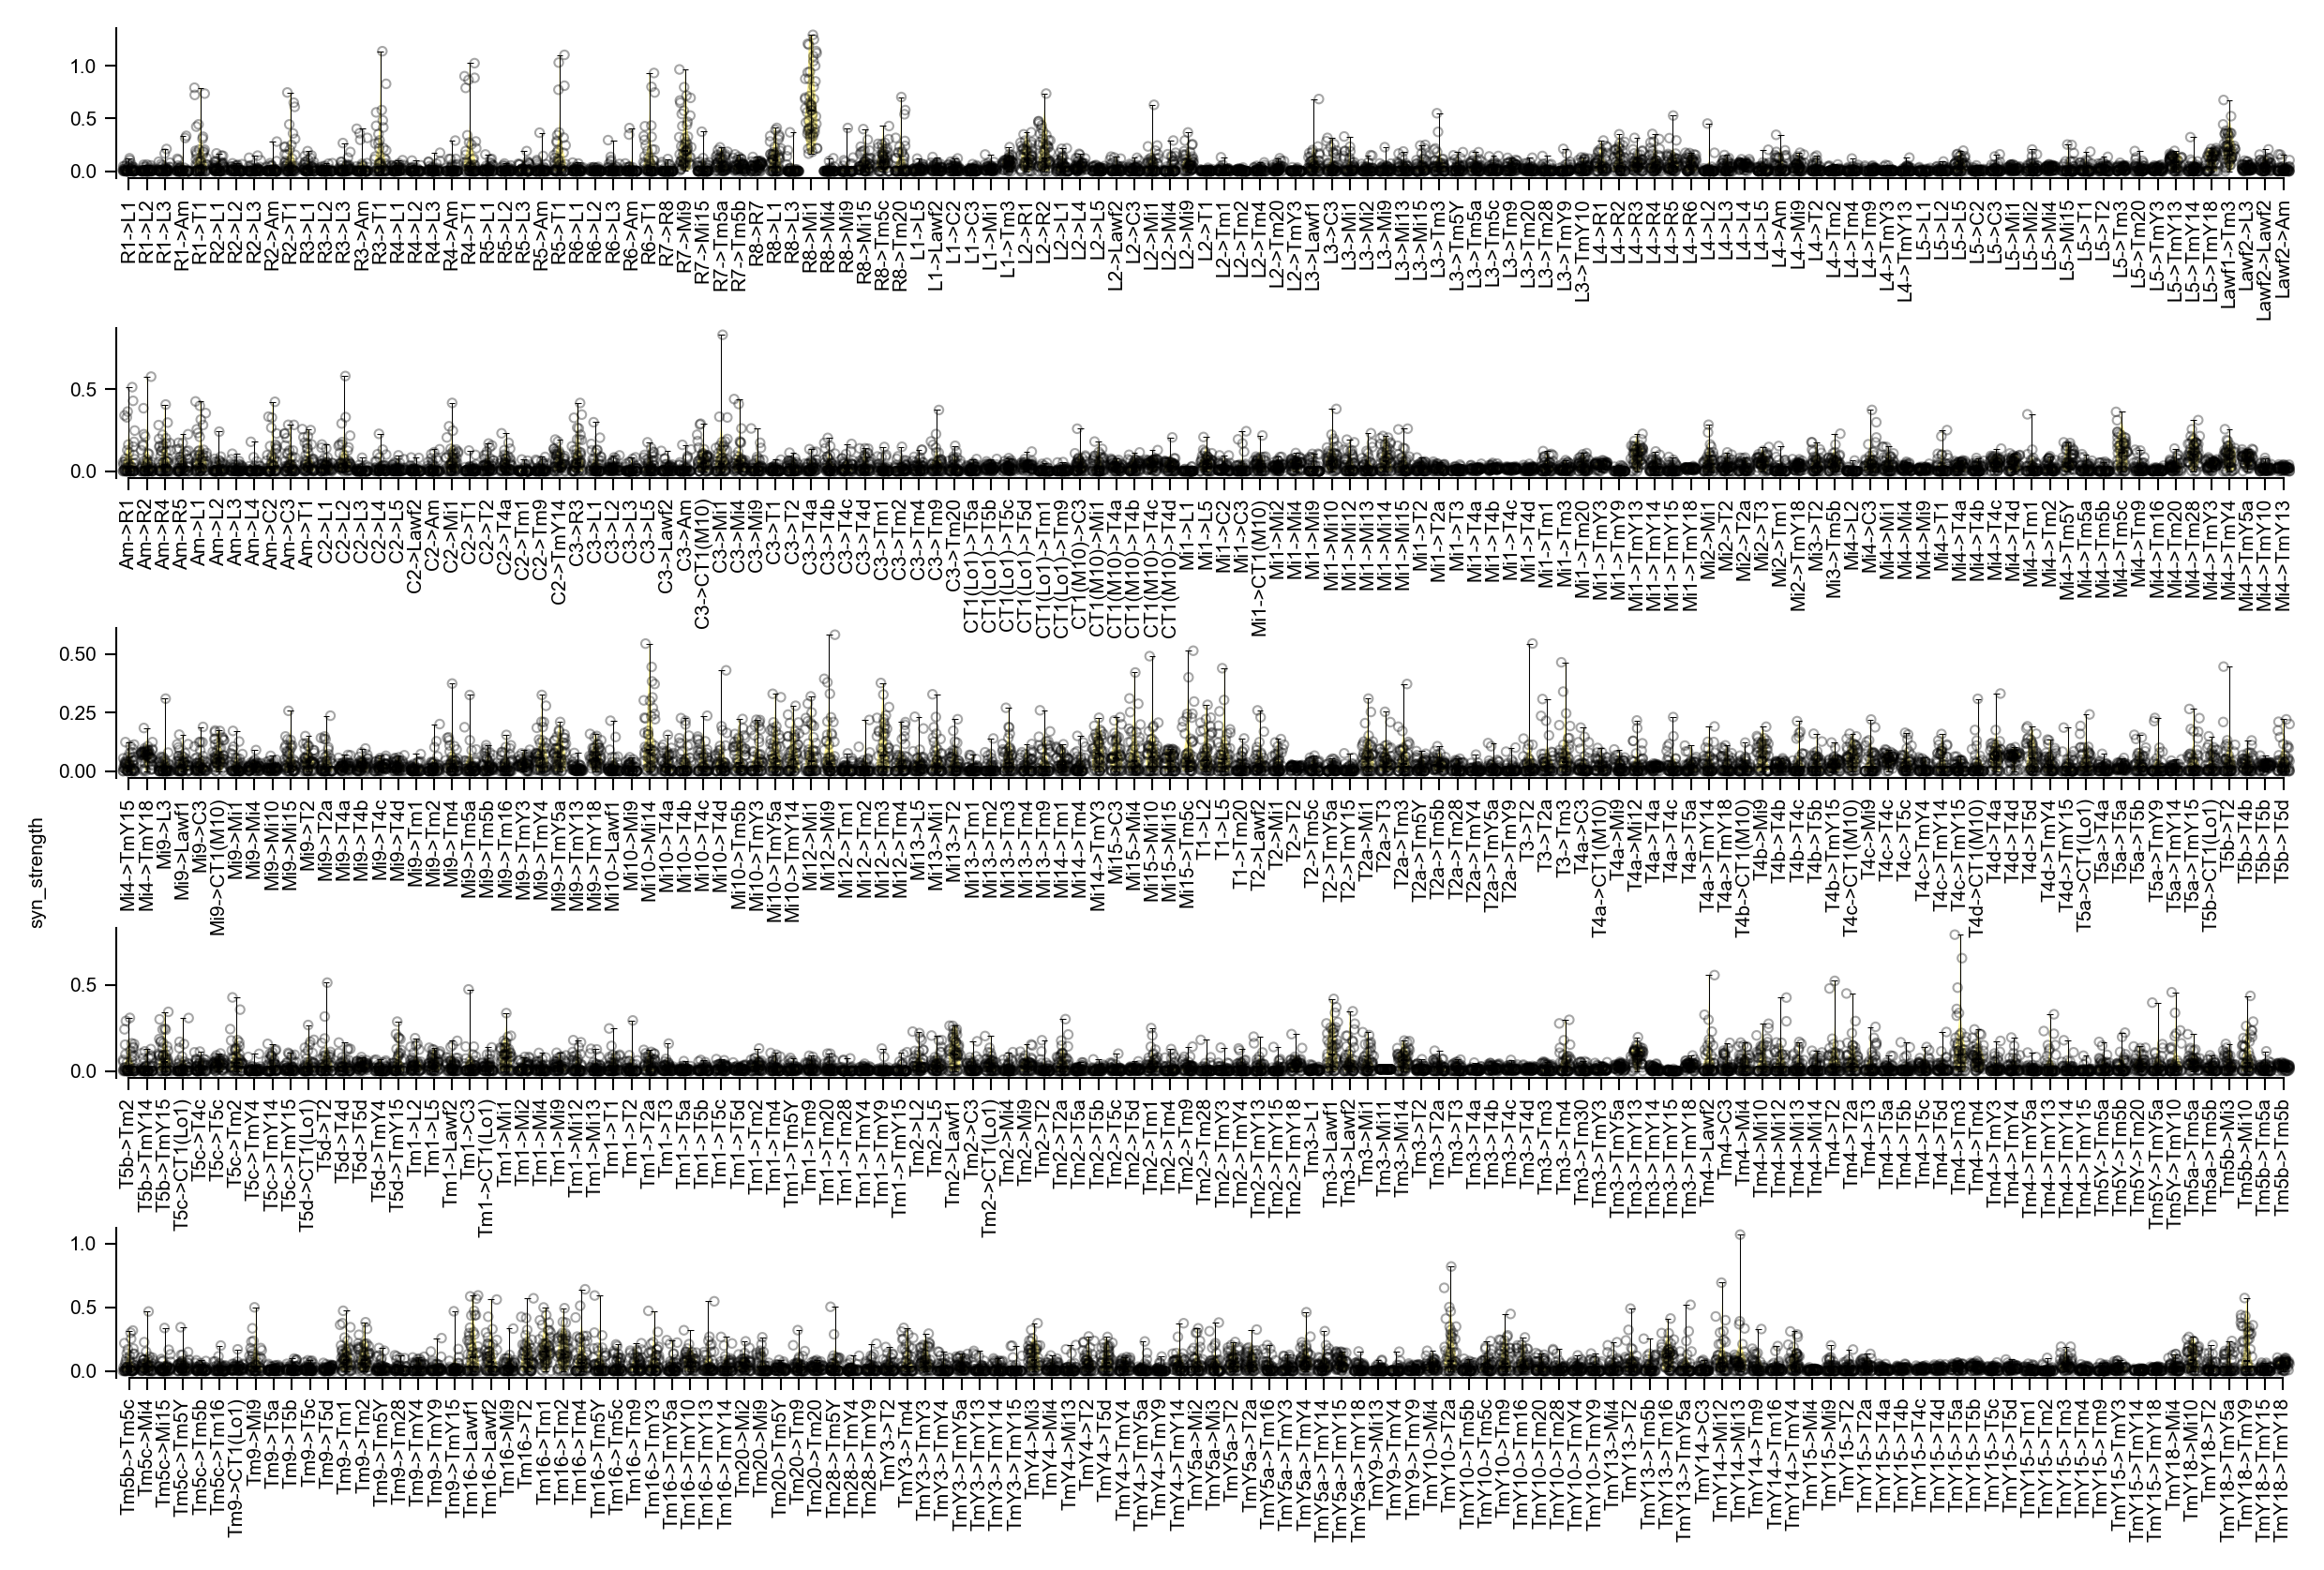

In [91]:
fig, axes = ensemble.edge_parameters("syn_strength")

## Dead or alive

___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
____________________________

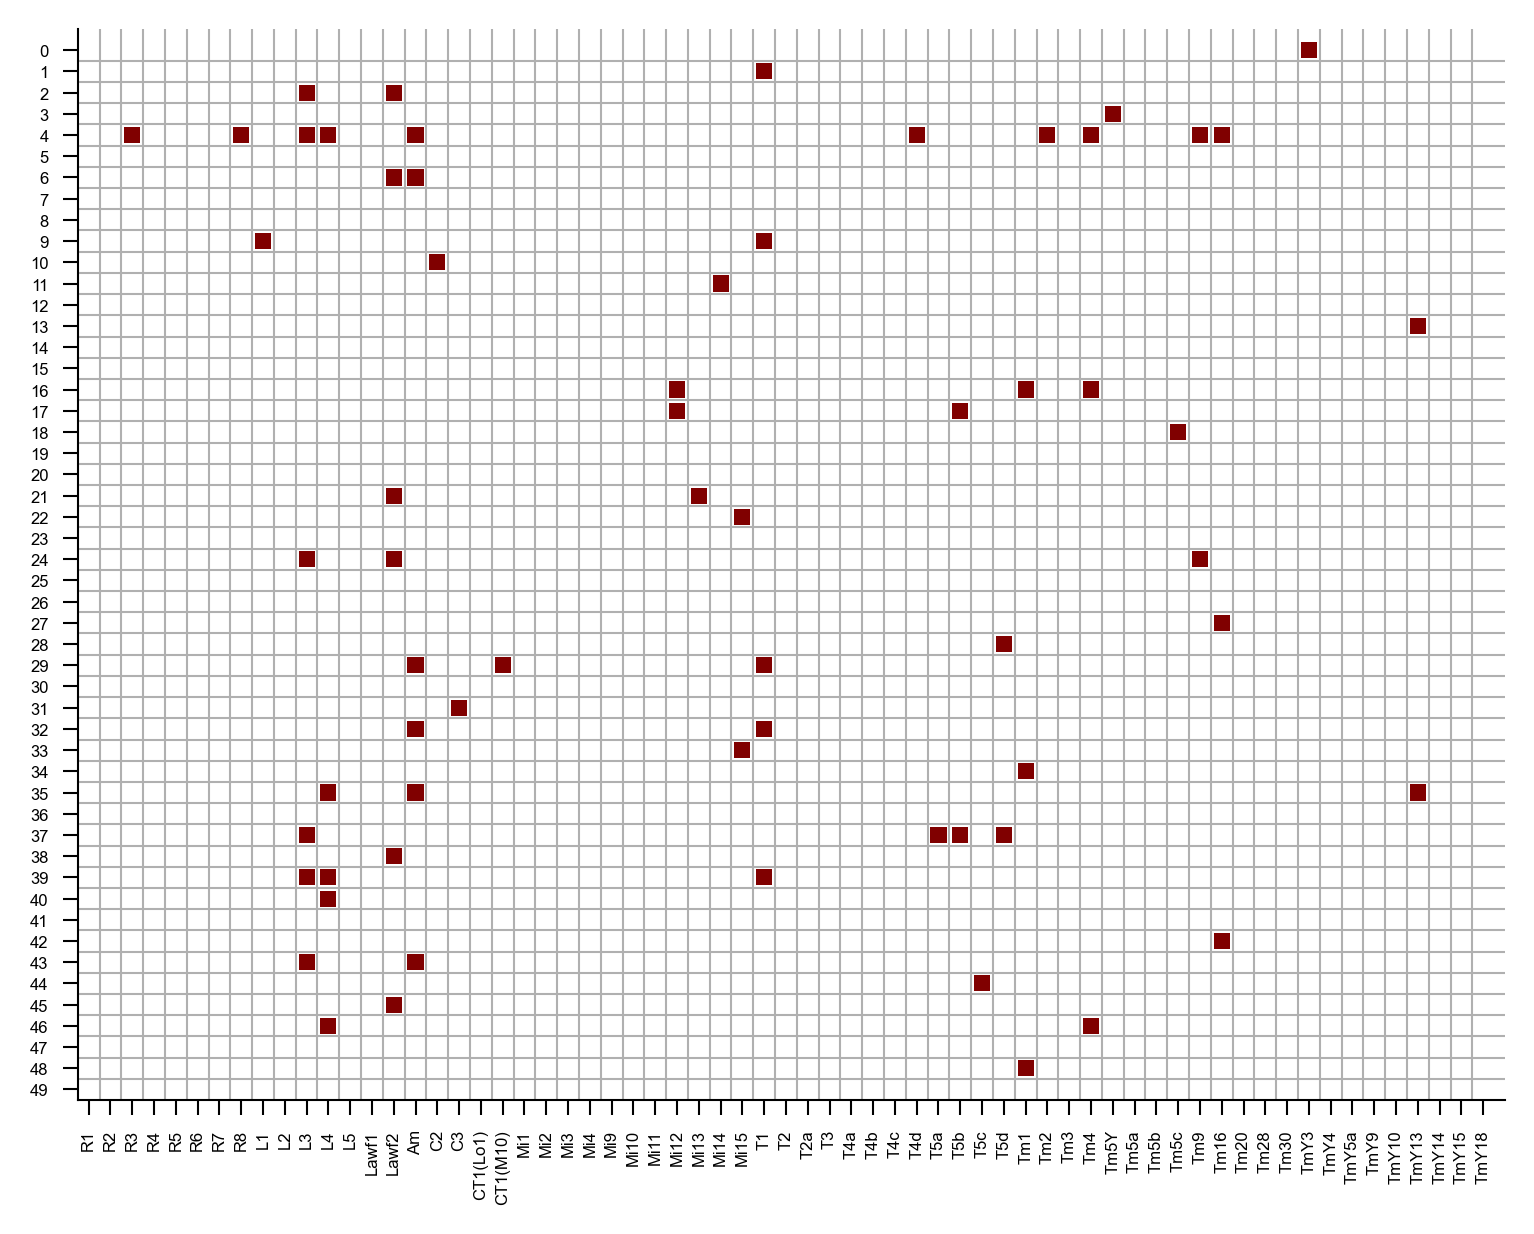

In [92]:
fig, ax, cbar, matrix = ensemble.dead_or_alive()

## Contrast selectivity and flash response indices (FRI)

#### 20% best task-performing models

___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min


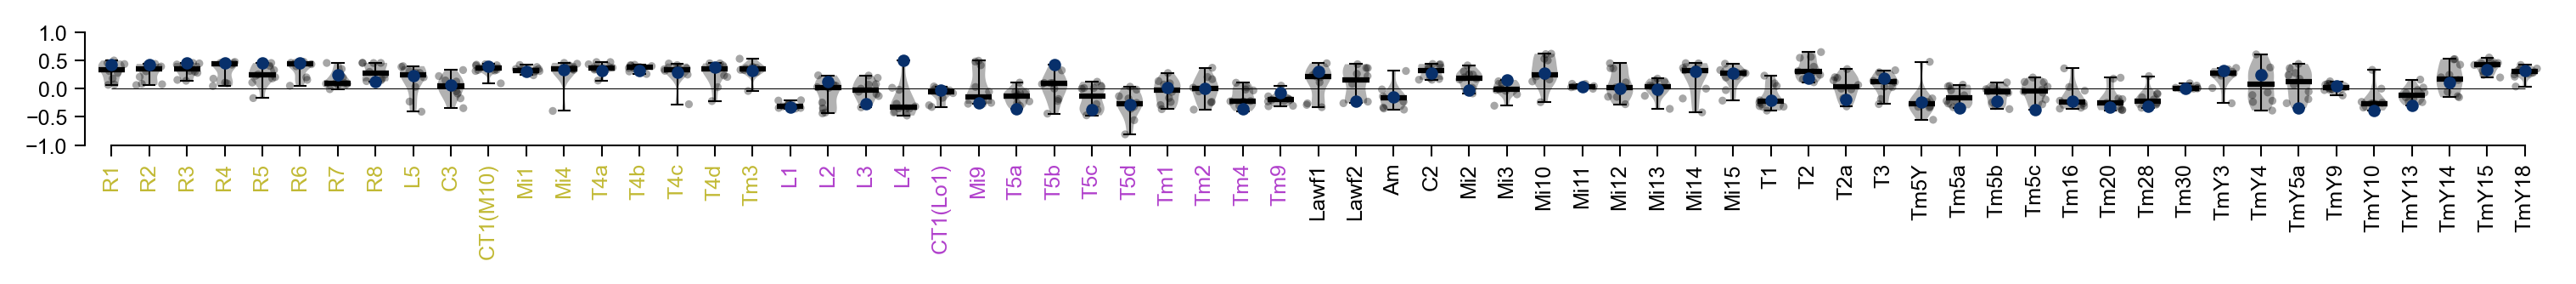

In [93]:
with ensemble.ratio(best=0.2):
    ensemble.flash_response_index()

#### 100% models

___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
____________________________

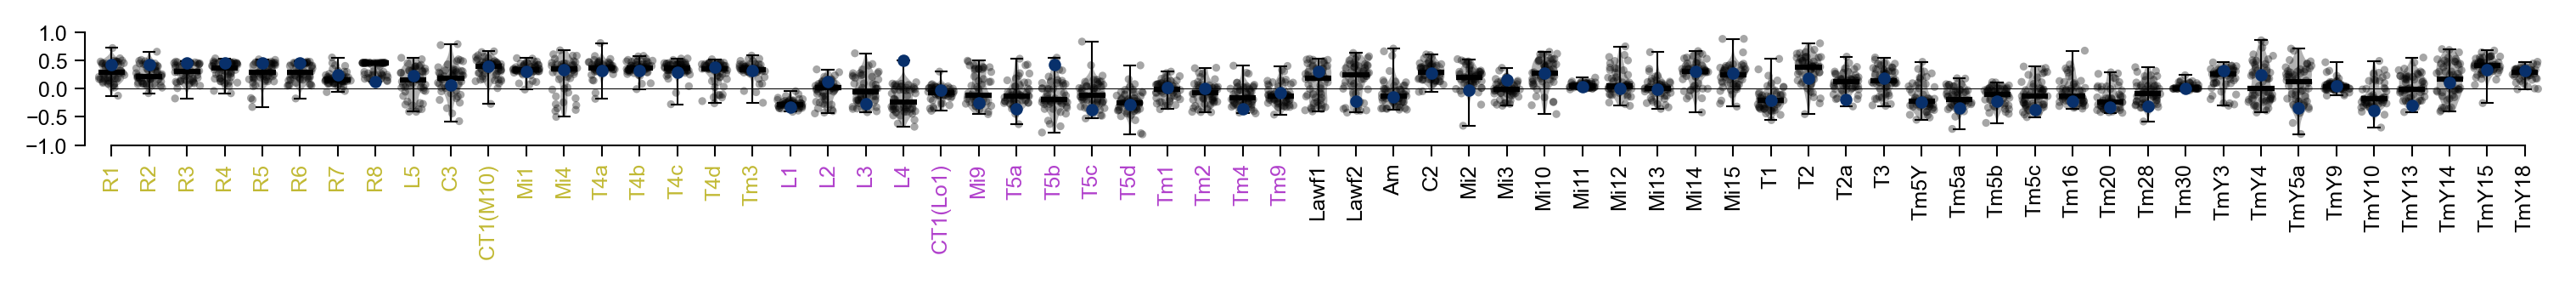

In [94]:
fig, ax = ensemble.flash_response_index()

## Motion selectivity and direction selectivity index (DSI)

#### 20% best task-performing models

___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min


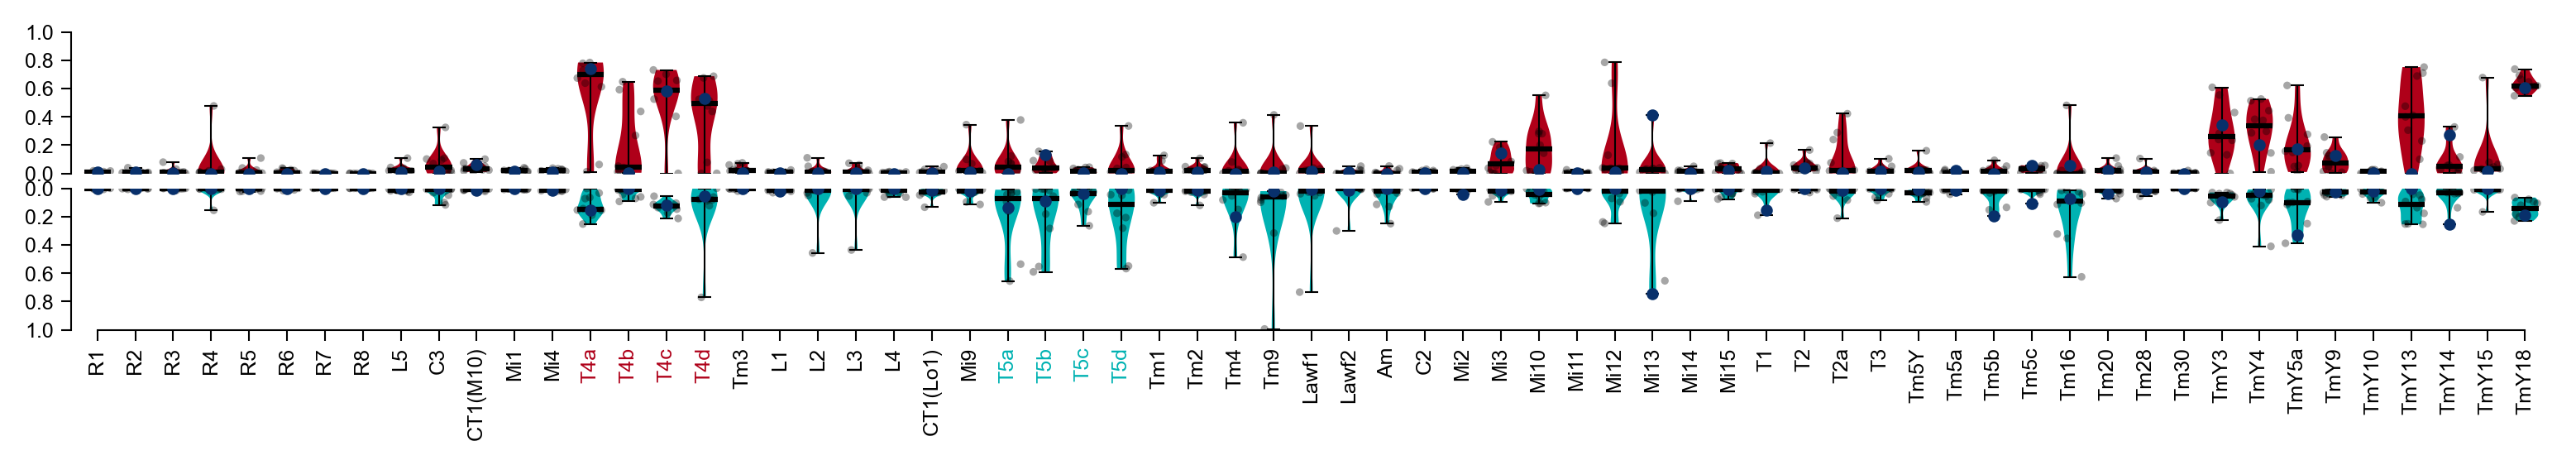

In [95]:
with ensemble.ratio(best=0.2):
    ensemble.direction_selectivity_index()

#### 100% models

___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
____________________________

(<Figure size 3000x360 with 2 Axes>, (<Axes: >, <Axes: >))

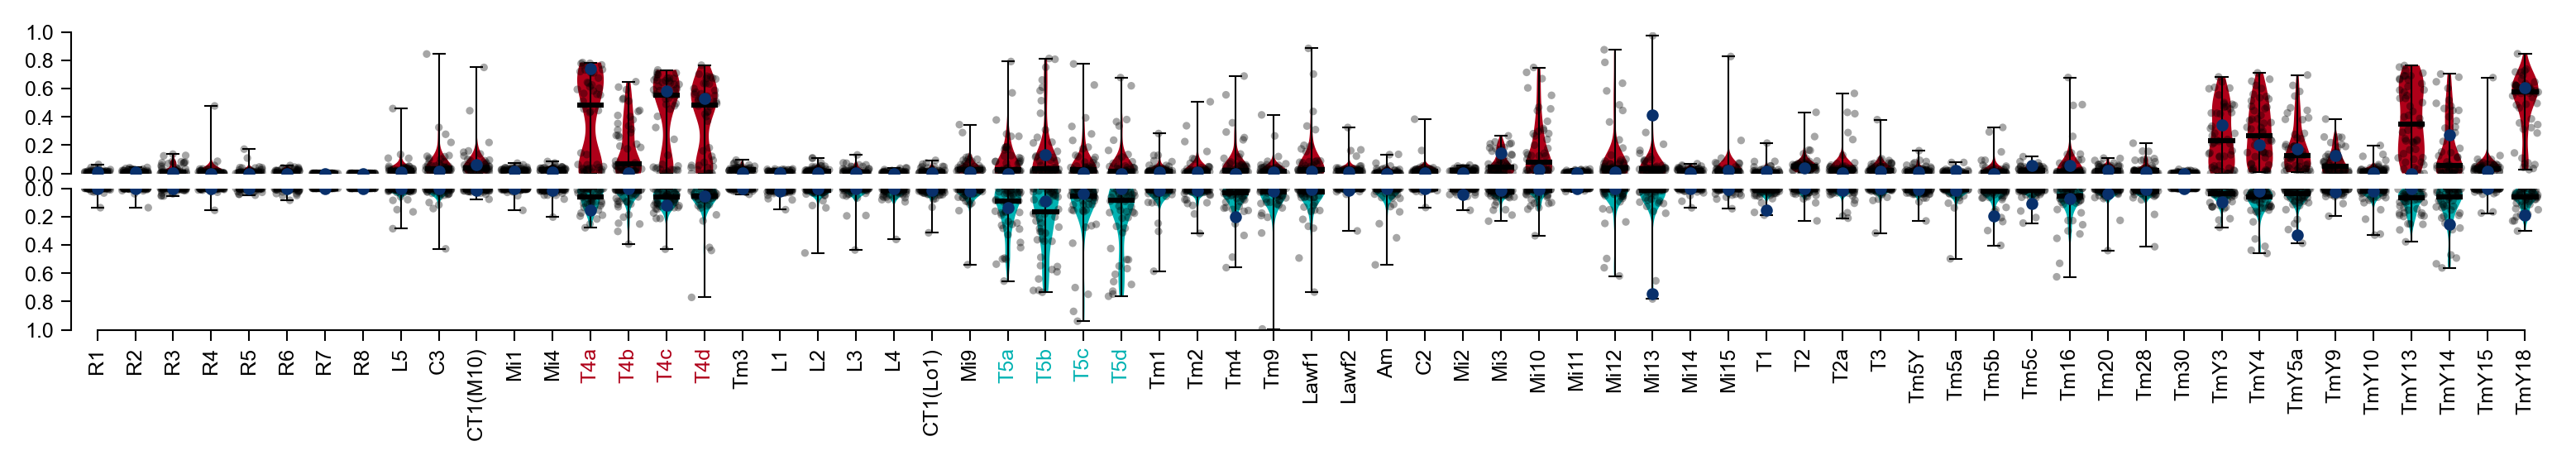

In [96]:
ensemble.direction_selectivity_index()

## Clustering of models based on responses to naturalistic stimuli

#### T4c

___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
___________________________________compute_responses cache loaded - 0.0s, 0.0min
____________________________

/home/lappalainenj@hhmi.org/miniconda3/envs/flyvision/lib/python3.9/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


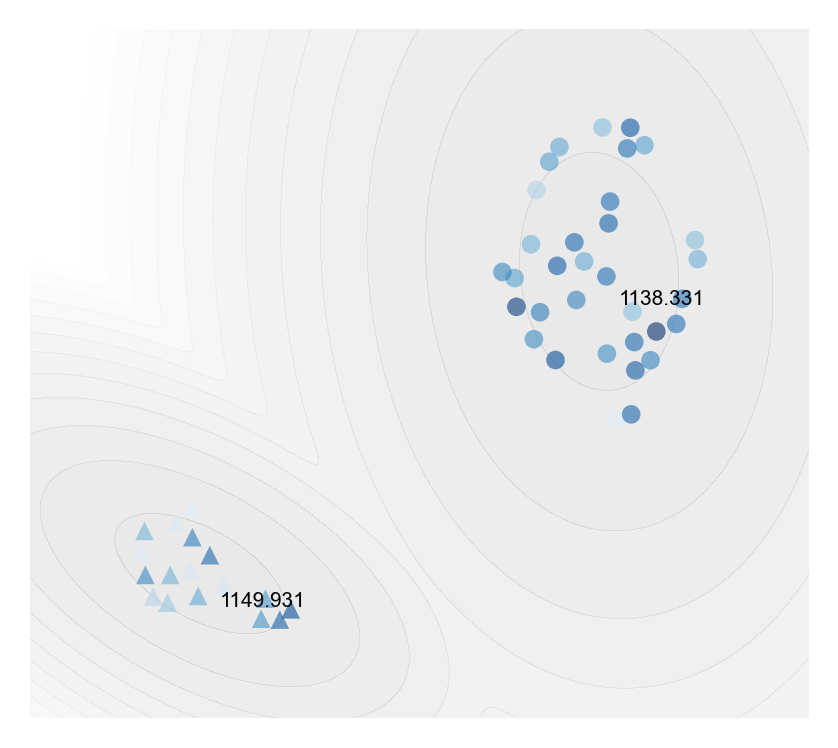

In [97]:
task_error = ensemble.task_error()
embeddingplot = ensemble.clustering("T4c").plot(task_error=task_error.values, 
                                                colors=task_error.colors)

In [98]:
r = ensemble.moving_edge_responses()

In [99]:
cluster_indices = ensemble.cluster_indices("T4c")

In [100]:
colors = ensemble.task_error().colors

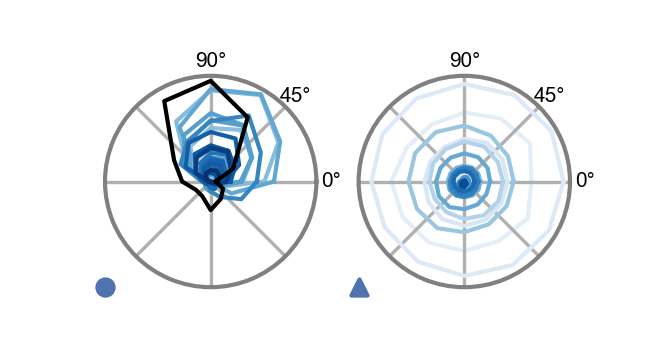

In [101]:
fig, axes = plt.subplots(
    1, len(cluster_indices), subplot_kw={"projection": "polar"}, figsize=[2, 1]
)
for cluster_id, indices in cluster_indices.items():
    plot_angular_tuning(
        r.sel(network_id=indices),
        "T4c",
        intensity=1,
        colors=colors[indices],
        zorder=ensemble.zorder()[indices],
        groundtruth=True if cluster_id == 0 else False,
        fig=fig,
        ax=axes[cluster_id],
    )
    add_cluster_marker(fig, axes[cluster_id], marker=get_marker(cluster_id))